# Best Selling Book Prices Webscraper

## Next feature:

Scrape data for top 100 books per category rather than top 20.

### Imports

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Create list of categories

In [2]:
r = requests.get('https://www.amazon.com/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_unv_b_1_4_1')
soup = BeautifulSoup(r.text, 'html.parser')
category_list = soup.find_all('ul',attrs={'id':'zg_browseRoot'})

In [3]:
category_links = category_list[0].find_all('a')

In [4]:
len(category_links)

38

In [5]:
category_links[1]['href'][42:] #Example category

'Arts-Photography/zgbs/books/1'

In [6]:
category_url_endings=[]

for i in range(1,len(category_links)): #Start at 1 to skip "all books category"
    category_url_endings.append(category_links[i]['href'][42:])

In [7]:
#category_url_endings.remove('Audible-Audiobooks/zgbs/books/2402172011') #Remove audible books

In [8]:
category_url_endings[5]

'Calendars/zgbs/books/3248857011'

In [9]:
category_names=[]

for ending in category_url_endings:
    category_names.append(ending.split('/')[0])

In [10]:
category_names[:3]

['Arts-Photography', 'Audible-Audiobooks', 'Biographies']

### Scrape pages

In [11]:
prices = []
titles = []
categories = []

for category,ending in zip(category_names,category_url_endings):
    print('** Parsing {} Category **'.format(category))

    url= 'https://www.amazon.com/Best-Sellers-Books-'+ending+'/ref=zg_bs_nav_b_1_b'
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    book_divs = soup.find_all('div',attrs={'class':'zg_itemImmersion'})

    for book in book_divs:
        titles.append(book.find('div',attrs={'class':'p13n-sc-truncate'}).text.strip())
        try: 
            prices.append(book.find('span',attrs={'class':'p13n-sc-price'}).text[1:])
        except: #Exception for audible books
            #print('  Audible book: {}'.format(titles[-1]))
            prices.append(-1)
        categories.append(category)
    #print('Last Title for Page: {}'.format(titles[-1]))
                

prices = [float(p) for p in prices]

** Parsing Arts-Photography Category **
** Parsing Audible-Audiobooks Category **
** Parsing Biographies Category **
** Parsing CD Category **
** Parsing Business-Money Category **
** Parsing Calendars Category **
** Parsing Childrens Category **
** Parsing Christian-Bibles Category **
** Parsing Comics-Graphic-Novels Category **
** Parsing Computers-Technology Category **
** Parsing Cookbooks-Food-Wine Category **
** Parsing Crafts-Hobbies-Home Category **
** Parsing Deals Category **
** Parsing Education-Teaching Category **
** Parsing Engineering-Transportation Category **
** Parsing Gay-Lesbian Category **
** Parsing Health-Fitness-Dieting Category **
** Parsing History Category **
** Parsing Humor-Entertainment Category **
** Parsing Law Category **
** Parsing Libros-en-español Category **
** Parsing Literature-Fiction Category **
** Parsing Medical Category **
** Parsing Mystery-Thriller-Suspense Category **
** Parsing Parenting-Relationships Category **
** Parsing Politics-Socia

In [12]:
#Prototype for iterating over all 5 pages per category
"""
prices = []
titles = []
categories = []

for category,ending in zip(category_names,category_url_endings):
    print(category)
    print(ending)
    print('** Parsing {} Category **'.format(category))

    for i in range(1,6):
        print('Parsing Page {}...'.format(i))
        url= 'https://www.amazon.com/Best-Sellers-Books-'+ending+'/ref=zg_bs_nav_b_1_b#'+str(i)
        r = requests.get(url)
        print(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        book_divs = soup.find_all('div',attrs={'class':'zg_itemImmersion'})

        for book in book_divs:
            titles.append(book.find('div',attrs={'class':'p13n-sc-truncate'}).text.strip())
            try: 
                prices.append(book.find('span',attrs={'class':'p13n-sc-price'}).text[1:])
            except: #Exception for audible books
                print('  Audible book: {}'.format(titles[-1]))
                prices.append(-1)
            categories.append(category)
        print('Last Title for Page: {}'.format(titles[-1]))
                

prices = [float(p) for p in prices]
"""
print()

### Create dataframe

In [13]:
books_and_audible = pd.DataFrame({'Price':prices,'Title':titles,'Category':categories})

books_and_audible.head()

,Category,Price,Title
0,Arts-Photography,2.99,Boys in the Trees: A Memoir
1,Arts-Photography,34.10,The Legend of Zelda Encyclopedia
2,Arts-Photography,9.59,The 5 Love Languages: The Secret to Love that ...
3,Arts-Photography,-1.00,Born a Crime: Stories from a South African Chi...
4,Arts-Photography,18.00,The Atlas of Beauty: Women of the World in 500...


In [14]:
books = books_and_audible[books_and_audible['Price']>-1] #Drop audible books from each category

### Examine prices

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
categories_in_order_by_median_price = books.groupby('Category')['Price'].median().sort_values(ascending=False).index

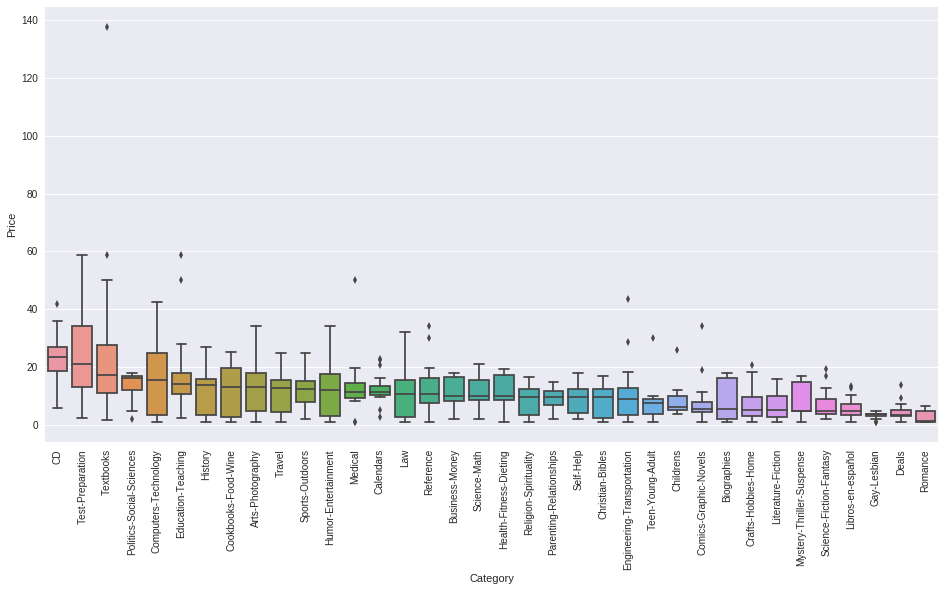

In [17]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.boxplot(x='Category',y='Price',data=books,orient='v', order = categories_in_order_by_median_price)

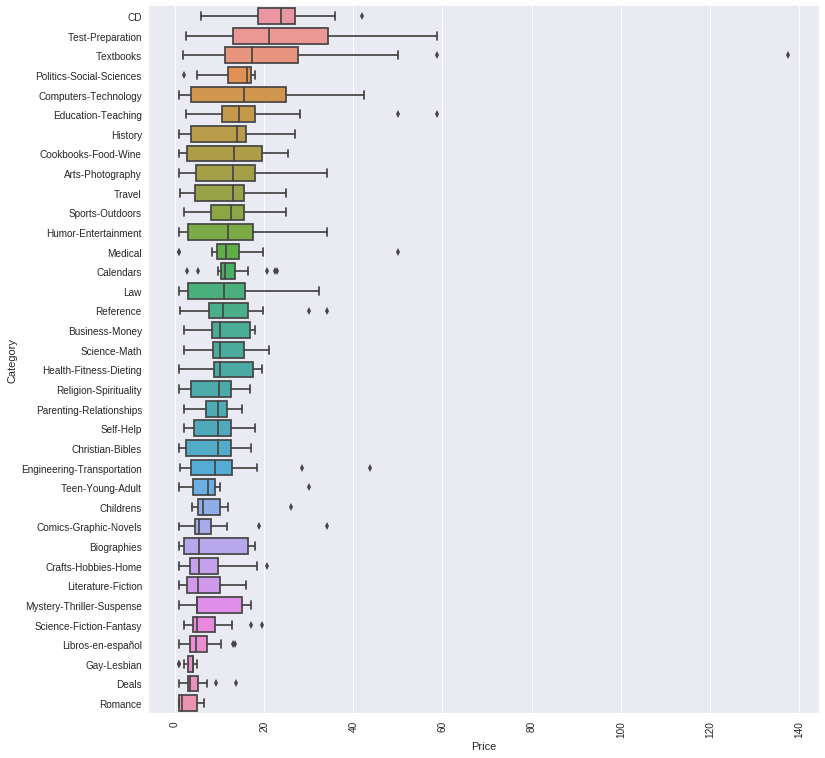

In [18]:
plt.figure(figsize=(12,13))
plt.xticks(rotation=90)
sns.boxplot(x='Price',y='Category',data=books,orient='h', order = categories_in_order_by_median_price)

### Feature Extraction - Title length

In [19]:
books['Title Length'] = books['Title'].apply(lambda x: len(x))

/home/josh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
books.head()

,Category,Price,Title,Title Length
0,Arts-Photography,2.99,Boys in the Trees: A Memoir,27
1,Arts-Photography,34.10,The Legend of Zelda Encyclopedia,32
2,Arts-Photography,9.59,The 5 Love Languages: The Secret to Love that ...,51
4,Arts-Photography,18.00,The Atlas of Beauty: Women of the World in 500...,56
5,Arts-Photography,13.03,ENTERTAINMENT WEEKLY The Ultimate Guide to Sup...,55


### Examine Title lengths

In [21]:
categories_in_order_by_median_length = books.groupby('Category')['Title Length'].median().sort_values(ascending=False).index

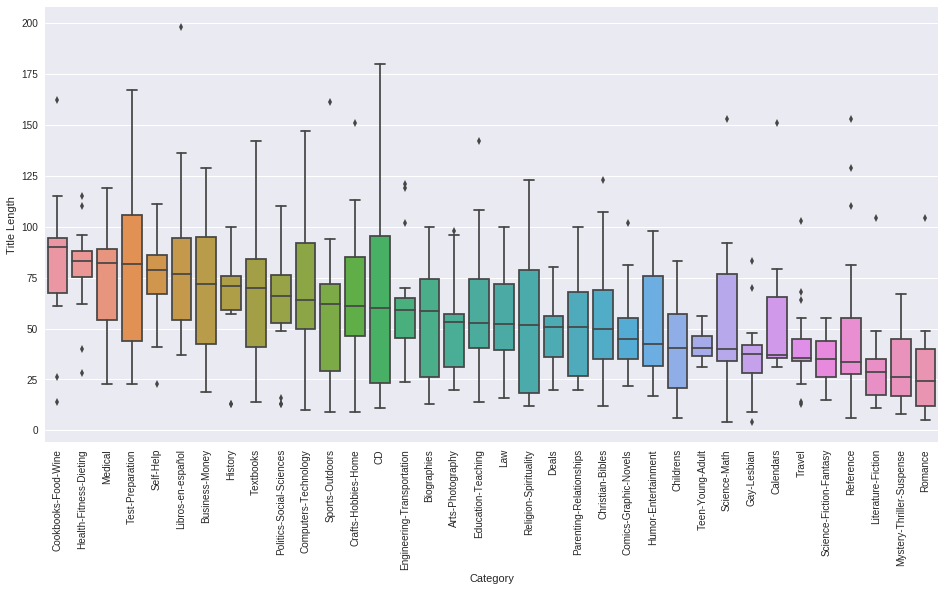

In [22]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.boxplot(x='Category',y='Title Length',data=books,order=categories_in_order_by_median_length)

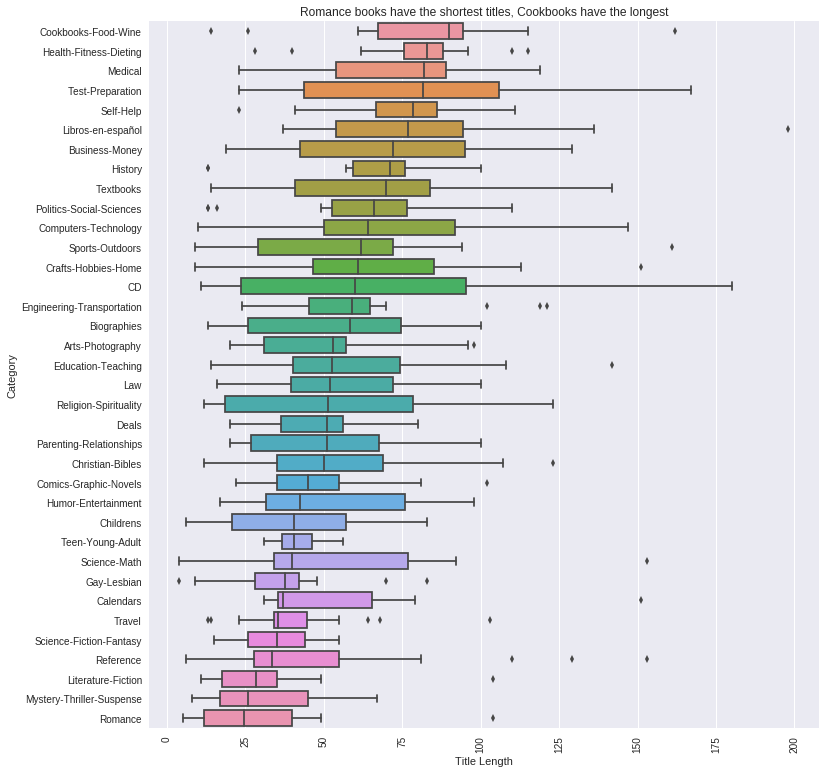

In [23]:
plt.figure(figsize=(12,13))
plt.xticks(rotation=90)
sns.boxplot(x='Title Length', y='Category',data=books,orient='h',order=categories_in_order_by_median_length);
plt.title('Romance books have the shortest titles, Cookbooks have the longest')